In [133]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split


import seaborn as sns
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


# ForestFire_Data.csv

# 1 - Business Problem

Prepare a Neural Network model can be built with target variable Burned Area for forestfires_data


# 2 - Data collection and description

In [30]:
data = pd.read_csv(r'/content/forestfires.csv')

In [31]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [32]:
data1 = data.copy()

# EDA

In [33]:
data1.drop(["month","day"],axis=1,inplace = True)


In [34]:
data1.shape

(517, 29)

In [35]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [36]:
data1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

Correlation

In [37]:
cor = data1[data1.columns[0:11]].corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,-0.021206
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,-0.181293


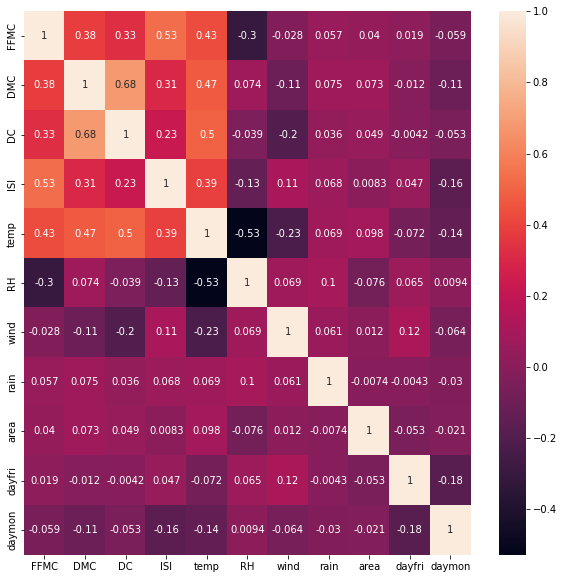

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

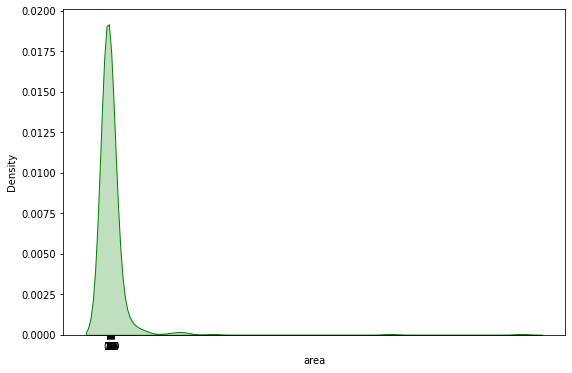

In [39]:
plt.figure(figsize=(9,6))
ax = sns.kdeplot(data1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is highly skewed and has large kurtosis value

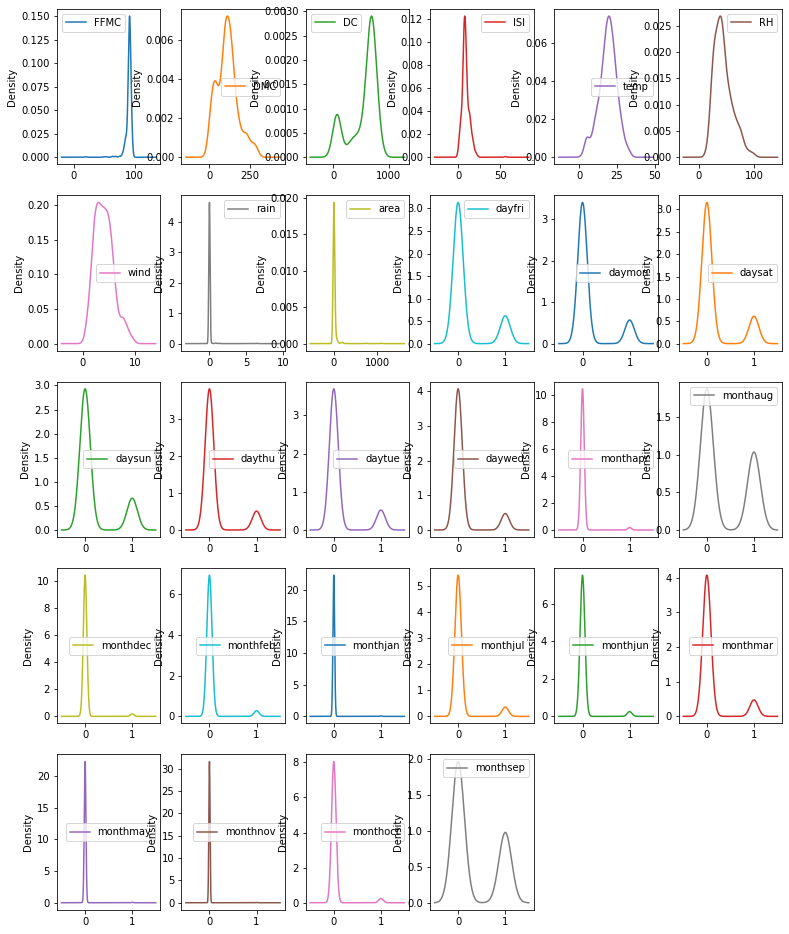

In [40]:
data1.plot(kind='density', subplots=True, layout=(6,6), figsize=(13,20), sharex=False, sharey=False)
plt.show()

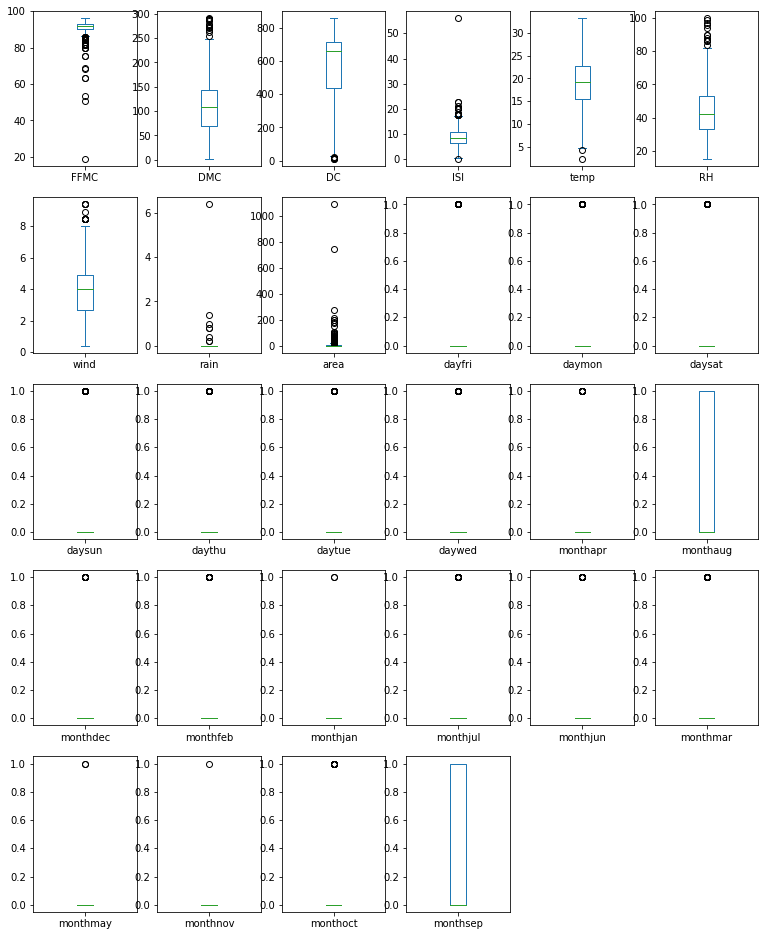

In [41]:
data1.plot(kind='box', subplots=True, layout=(6,6), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [42]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105,...,7.401340,4.798308,16.031038,3.646828,5.254127,2.594172,16.031038,22.737634,5.628522,0.712255
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265,...,52.984784,21.105386,255.984443,11.343218,25.705276,4.748083,255.984443,517.000000,29.795509,-1.498505


# Neural Network

In [45]:
X = np.array(data1.iloc[:,0:28])
y = np.array(data1.iloc[:,28])

In [46]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [47]:
X_norm = norm_func(X)

In [48]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [49]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 2s 2ms/step - loss: 0.6565 - accuracy: 0.5860
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: -0.3204 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7044 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: -1.1312 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: -1.6664 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 2ms/step - loss: -2.4202 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 2ms/step - loss: -3.4252 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 2ms/step - loss: -4.7704 - accuracy: 0.7312
Ep

In [52]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: -13191.5674 - accuracy: 0.7312
Accuracy: 73.12


# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 80%

In [61]:
predictions = model.predict(x_test)

predictions

4/4 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [63]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)


# GAS_TURBINES.CSV

# 1 - Business Problem

Use neural network model to prepare a model for predicting turbine energy yield (TEY) using ambient variables as features




# 2 - Data collection and description

In [119]:
data = pd.read_csv(r'/content/gas_turbines.csv')

In [120]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [121]:
data1 = data.copy()

# EDA

In [122]:
data1.shape

(15039, 11)

In [123]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [124]:
data1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Correlation

In [125]:
cor = data1.corr()
cor

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


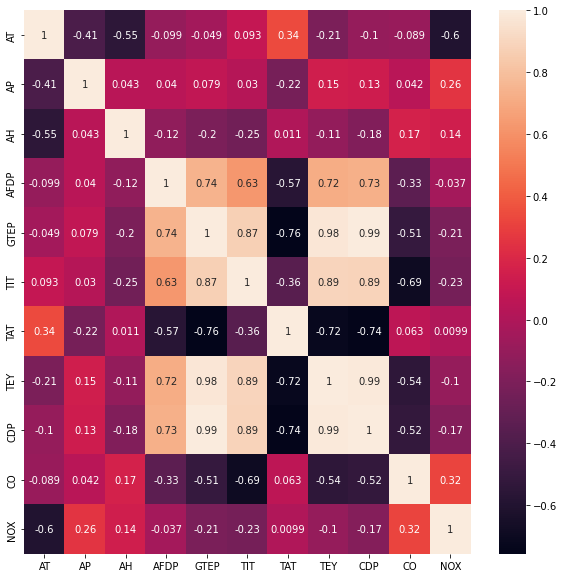

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

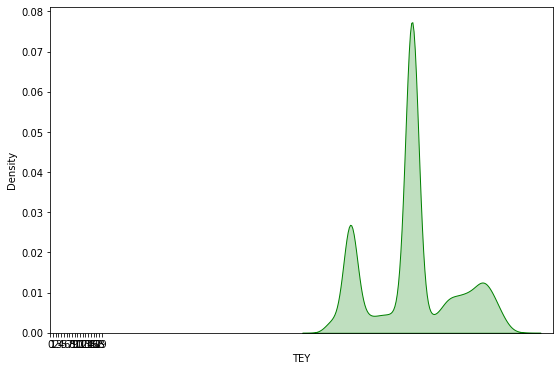

In [127]:
plt.figure(figsize=(9,6))
ax = sns.kdeplot(data1['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

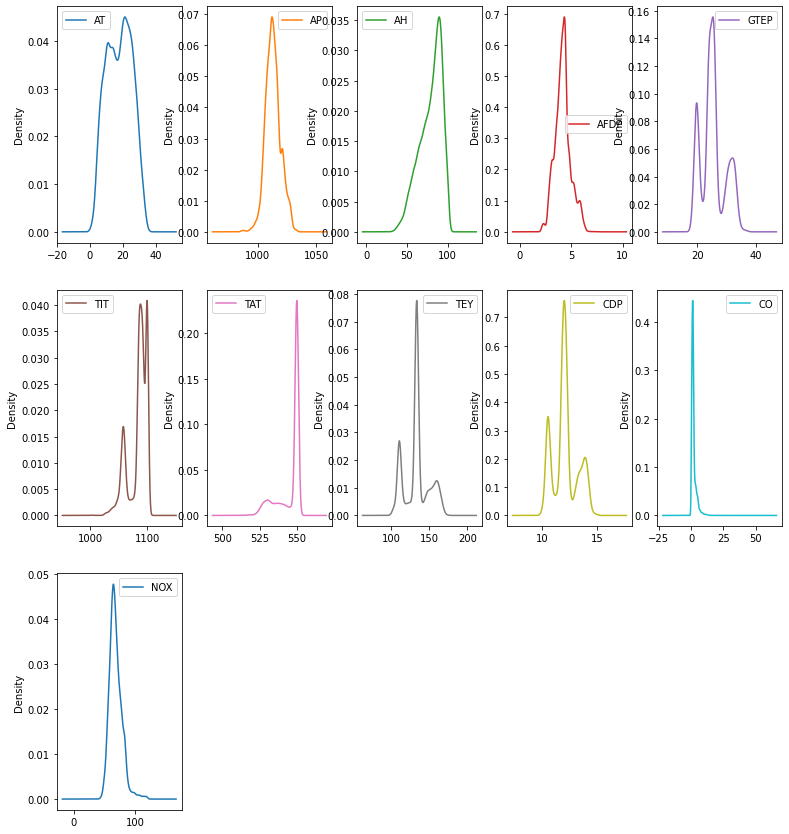

In [128]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

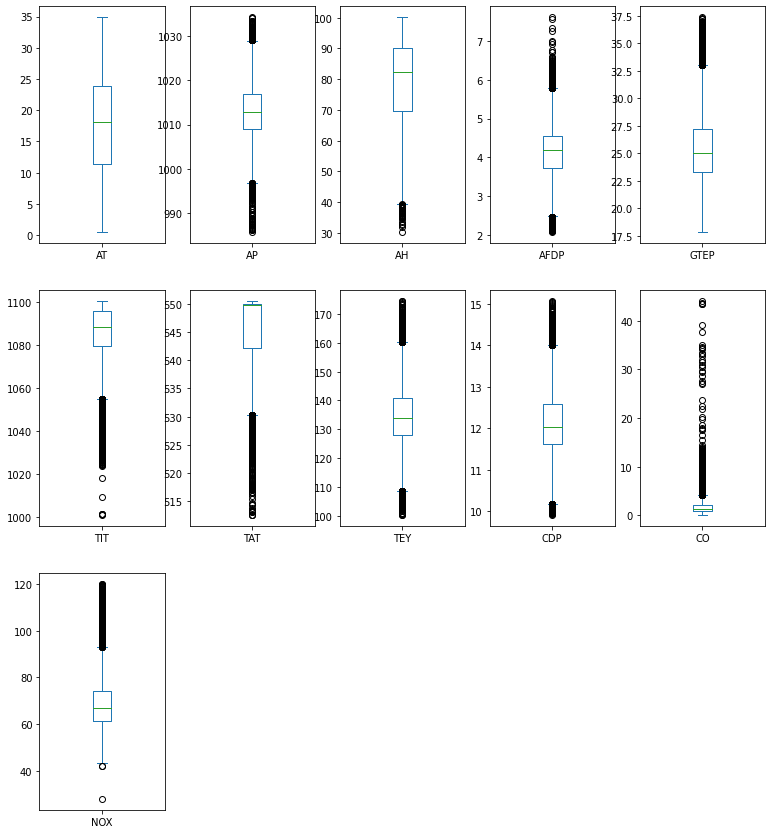

In [129]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [130]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


# Neural Network



Applying Standard Scaler

In [131]:
X = data1.drop('TEY',axis=1)
y = data1[['TEY']]


In [134]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(10527, 7)
(4512, 7)
(10527, 1)
(4512, 1)


In [135]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
148/148 [==============================] - 1s 4ms/step - loss: 0.2741 - mae: 0.2912 - mse: 0.2741 - val_loss: 0.0139 - val_mae: 0.0771 - val_mse: 0.0139
Epoch 2/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0576 - mse: 0.0082 - val_loss: 0.0058 - val_mae: 0.0511 - val_mse: 0.0058
Epoch 3/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0049 - mae: 0.0477 - mse: 0.0049 - val_loss: 0.0044 - val_mae: 0.0462 - val_mse: 0.0044
Epoch 4/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0040 - mae: 0.0436 - mse: 0.0040 - val_loss: 0.0037 - val_mae: 0.0428 - val_mse: 0.0037
Epoch 5/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0035 - mae: 0.0410 - mse: 0.0035 - val_loss: 0.0031 - val_mae: 0.0394 - val_mse: 0.0031
Epoch 6/100
148/148 [==============================] - 1s 4ms/step - loss: 0.0030 - mae: 0.0388 - mse: 0.0030 - val_loss: 0.0029 - val_mae: 0.0392 - val_mse: 0.0029
Epoch 7/10

In [136]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

Model Evaluation Train and Test Error

 Predicting values from Model using same dataset

In [141]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

141/141 [==============================] - 0s 1ms/step
(4512, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
8185,1.807215,1.821837,0.974223,-2.239381,1.062795,-0.691358,-1.295034,1.904806,1.845401
8994,-0.319403,-0.486864,-0.042280,0.587783,-0.212050,-0.007020,-1.586410,-0.032754,-0.026584
8944,1.918713,1.789731,0.992375,-2.358874,1.633192,-0.694018,-1.200871,1.846054,1.820383
3451,-1.634716,-1.403779,-1.669894,0.567443,-1.169860,1.525787,0.238527,-1.541991,-1.510180
8236,-0.260482,-0.451644,0.042429,0.573799,-0.567233,-0.153231,-1.477354,0.051900,0.008572
3508,0.256216,0.343799,0.786654,0.600495,0.277577,-0.364829,1.771520,0.065798,0.027272
6768,-0.062867,-0.211574,0.242099,0.590325,-1.760516,-0.505505,-0.290383,0.021576,0.026928
11903,0.951492,1.098750,0.998425,-0.535964,0.300993,-0.661310,1.556972,0.767666,0.769956
9257,1.896958,1.741573,0.998425,-2.376671,1.862746,-0.383325,-1.143755,1.832787,1.776932
2911,0.075825,0.130083,0.568832,0.575071,-0.009464,-0.243999,1.350742,-0.022646,-0.037791


Calculating Absolute Percent Error and Error

In [142]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  88.89914945473322


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %
8185,1.807215,1.821837,0.974223,-2.239381,1.062795,-0.691358,-1.295034,1.904806,1.845401,3.118706
8994,-0.319403,-0.486864,-0.042280,0.587783,-0.212050,-0.007020,-1.586410,-0.032754,-0.026584,-18.836562
8944,1.918713,1.789731,0.992375,-2.358874,1.633192,-0.694018,-1.200871,1.846054,1.820383,1.390546
3451,-1.634716,-1.403779,-1.669894,0.567443,-1.169860,1.525787,0.238527,-1.541991,-1.510180,-2.062958
8236,-0.260482,-0.451644,0.042429,0.573799,-0.567233,-0.153231,-1.477354,0.051900,0.008572,83.484279


In [143]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %,Error
0,1.807215,1.821837,0.974223,-2.239381,1.062795,-0.691358,-1.295034,1.904806,1.845401,3.118706,0.031187
1,-0.319403,-0.486864,-0.042280,0.587783,-0.212050,-0.007020,-1.586410,-0.032754,-0.026584,-18.836562,0.188366
2,1.918713,1.789731,0.992375,-2.358874,1.633192,-0.694018,-1.200871,1.846054,1.820383,1.390546,0.013905
3,-1.634716,-1.403779,-1.669894,0.567443,-1.169860,1.525787,0.238527,-1.541991,-1.510180,-2.062958,0.020630
4,-0.260482,-0.451644,0.042429,0.573799,-0.567233,-0.153231,-1.477354,0.051900,0.008572,83.484279,0.834843
...,...,...,...,...,...,...,...,...,...,...,...
4507,-0.007572,0.065873,0.459921,0.589054,0.191807,-0.742957,0.882830,-0.025804,-0.028783,-11.544079,-0.115441
4508,0.102113,0.101572,0.260251,0.165742,0.693009,-0.441459,-0.347816,0.177617,0.172095,3.109009,0.031090
4509,-1.409001,-1.301713,-1.518629,0.582698,-1.414016,0.419552,0.349431,-1.431435,-1.386442,-3.143247,0.031432
4510,-1.573981,-1.456250,-1.669894,0.583969,-0.883083,1.262617,0.008268,-1.542622,-1.500520,-2.729242,0.027292


Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

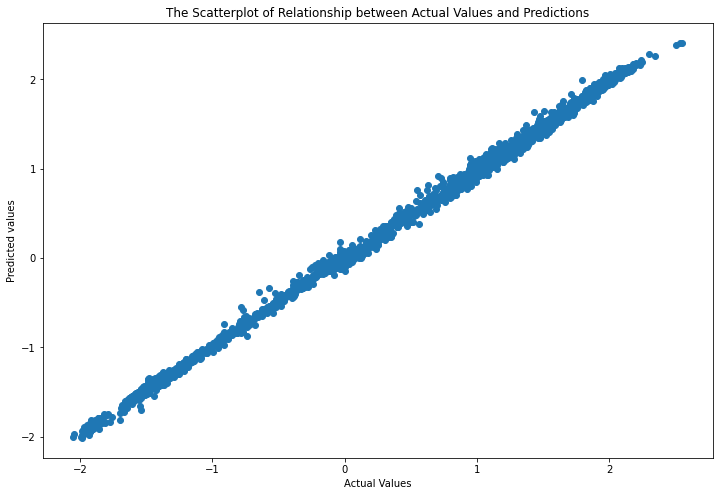

In [144]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [145]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.03085067629849367
MSE: 0.0017527231234565335
RMSE: 0.04186553622559412


In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

329/329 [==============================] - 0s 1ms/step
R2_score (train):  0.9986407675611031
R2_score (test):  0.9982828557829686


## Conclusion

In [147]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.83 of the target correctly
